<img src="https://ri.lasa.com.br/img/2020/logo.png" width="600">

# reviews de produtos da loja Americas

Ele contém mais de 130 mil avaliações de clientes de comércio eletrônico, coletadas no site da Americanas.com entre janeiro e maio de 2018.

## Grupo

Alan Pereira, Diego Oliveira

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\conta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#url = 'https://raw.githubusercontent.com/alanexplorer/NLP-b2w-reviews01/master/NLP-UFAL/dataset.csv'
url = 'dataset.csv'

In [3]:
df = pd.read_csv(url)

## Usando sua base de textos após os pré-processamento realizados na lista 2, realize as seguintes tarefas:

### 1. Escolha 10 documentos da base, e determine seu documento mais parecido (que não pode ser ele mesmo), usando:

In [4]:
# pegamos 10 amostras aleatórias

reviews = df.head(10)
reviews.head(10)

,Unnamed: 0,recommend_to_a_friend,review_text
0,0,True,estou contente com a compra entrega rápida o ú...
1,1,True,por apenas reu consegui comprar esse lindo cop...
2,2,True,supera em agilidade e praticidade outras panel...
3,3,True,meu filho amou parece de verdade com tantos de...
4,4,True,a entrega foi no prazo as americanas estão de ...
5,5,True,excelente produto por fora em material acrílic...
6,6,True,produto mto bom com essa garrafinha vc pode at...
7,7,True,produto excelente qualidade boa câmera desenvo...
8,8,True,o barulho e minimo e o vento é bem forte na ve...
9,9,False,meu produto nao foi entregue e a americanas es...


### a. Representação vetorial CountVectorizer com similaridade do cosseno;

In [5]:
stop_words = stopwords.words('portuguese')
cv = CountVectorizer(stop_words = stop_words)
dictionary = cv.fit_transform(reviews['review_text'])
df_dictionary = pd.DataFrame(dictionary.toarray(), columns=cv.get_feature_names())

In [6]:
df_dictionary.head(10)

,acabe,acrílico,adamantio,agilidade,americanas,amou,android,antes,apenas,aplicativos,...,tv,têm,usar,vc,velocidade,vender,vento,verdade,água,único
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity

pairs = list(combinations(range(len(reviews['review_text'])),2))

In [8]:
combos = [(reviews['review_text'][a_index], reviews['review_text'][b_index]) for (a_index, b_index) in pairs]

In [9]:
results = [cosine_similarity(dictionary[a_index].toarray(), dictionary[b_index].toarray()) for (a_index, b_index) in pairs]

In [10]:
results

[array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.13867505]]),
 array([[0.06726728]]),
 array([[0.06362848]]),
 array([[0.09805807]]),
 array([[0.]]),
 array([[0.20965697]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.09166985]]),
 array([[0.086711]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.04902903]]),
 array([[0.]]),
 array([[0.04499213]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.06063391]]),
 array([[0.11470787]]),
 array([[0.1767767]]),
 array([[0.]]),
 array([[0.09449112]]),
 array([[0.05564149]]),
 array([[0.17149859]]),
 array([[0.]]),
 array([[0.09166985]]),
 array([[0.08111071]]),
 array([[0.]]),
 array([[0.086711]]),
 array([[0.]]),
 array([[0.13363062]]),
 array([[0.]])]

In [11]:
sorted(zip(results, combos), reverse=True)

[(array([[0.20965697]]),
  ('estou contente com a compra entrega rápida o único problema com as americanas é se houver troca ou devolução do produto o consumidor tem problemas com espera',
   'meu produto nao foi entregue e a americanas esta descontando na fatura do meu cartão')),
 (array([[0.1767767]]),
  ('a entrega foi no prazo as americanas estão de parabéns a smart tv é muito boa a navegação na internete e pelos aplicativos e excelente não trava sem falar da imagem que é de surpreender recomendo',
   'produto excelente qualidade boa câmera desenvolvimento do android com rapidez')),
 (array([[0.17149859]]),
  ('excelente produto por fora em material acrílico super resistente e por dentro em adamantio faz milagre com qualquer bebida sugiro aproveitarem a promoção antes que acabe',
   'produto excelente qualidade boa câmera desenvolvimento do android com rapidez')),
 (array([[0.13867505]]),
  ('estou contente com a compra entrega rápida o único problema com as americanas é se houver 

trechos semelhantes:

produto, americanas, do

### 2. Representação vetorial TF-IDF com similaridade do cosseno.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer(stop_words = stop_words)
X_tfidf = cv_tfidf.fit_transform(reviews['review_text']).toarray()
df_dictionary = pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

In [13]:
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.2932512 ],
       [0.        , 0.33484489, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
df_dictionary

,acabe,acrílico,adamantio,agilidade,americanas,amou,android,antes,apenas,aplicativos,...,tv,têm,usar,vc,velocidade,vender,vento,verdade,água,único
0,0.000000,0.000000,0.000000,0.000000,0.218100,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.293251
1,0.000000,0.334845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.393893,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.197824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.197824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.377964,0.000000,0.000000,0.000000,0.000000,0.000000,0.377964,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.200007,0.000000,0.000000,0.000000,0.000000,0.268924,...,0.228610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.252955,0.215035,0.252955,0.000000,0.000000,0.000000,0.000000,0.252955,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.204081,0.000000,0.000000,0.240069,0.000000,0.240069,0.000000,0.000000,0.240069,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388414,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.408248,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.306039,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
results_tfidf = [cosine_similarity(X_tfidf[a_index].reshape(1,-1), X_tfidf[b_index].reshape(1,-1)) for (a_index, b_index) in pairs]
sorted(zip(results_tfidf, combos), reverse=True)

[(array([[0.13326138]]),
  ('a entrega foi no prazo as americanas estão de parabéns a smart tv é muito boa a navegação na internete e pelos aplicativos e excelente não trava sem falar da imagem que é de surpreender recomendo',
   'produto excelente qualidade boa câmera desenvolvimento do android com rapidez')),
 (array([[0.10929835]]),
  ('estou contente com a compra entrega rápida o único problema com as americanas é se houver troca ou devolução do produto o consumidor tem problemas com espera',
   'meu produto nao foi entregue e a americanas esta descontando na fatura do meu cartão')),
 (array([[0.10061179]]),
  ('estou contente com a compra entrega rápida o único problema com as americanas é se houver troca ou devolução do produto o consumidor tem problemas com espera',
   'a entrega foi no prazo as americanas estão de parabéns a smart tv é muito boa a navegação na internete e pelos aplicativos e excelente não trava sem falar da imagem que é de surpreender recomendo')),
 (array([[0.

trechos semelhantes:

produto, excelente, boa, 

### 2. Elabore um problema de classificação binária de textos coerente com sua base.

#### a) Rotule seus documentos manualmente (sugestão: separar em pastas distintas).

Resposta: Nosso documento já está rotulado em duas classes: True e False, para a pergunta se recomendaria para um amigo

#### b) Extraia as representações vetoriais com CountVectorizer e TF-IDF.
#### c) Treine um classificador baseado em cada uma das duas representações vetoriais e Regressão Logística usando validação cruzada com 70% das amostras selecionadas para treino e 30% para teste. Exiba as matrizes de confusão, métricas de acurácia, precisao, recall e F1 score.
#### d) Faça o mesmo para o classificador Naive-Bayes.
#### e) Faça o mesmo para um outro classificador de sua preferência (pesquise na biblioteca Scikit-learn).
#### f) Compare os 6 resultados.

In [16]:
reviews = pd.read_csv(url)
# Detela as linhas com informações faltando
reviews.dropna(inplace=True)
# reinicia a contagem das linhas
df.reset_index(drop=True, inplace=True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
reviews_train, reviews_test = train_test_split(reviews, test_size=0.3, random_state=42)

# CountVectorizer e Regressão Logística

In [19]:
model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", LogisticRegression(solver="saga", C=10))
])

In [20]:
dtm_train = model["vectorizer"].fit_transform(reviews_train["review_text"])

In [21]:
len(model["vectorizer"].get_feature_names())

20434

In [22]:
dtm_train

<18522x20434 sparse matrix of type '<class 'numpy.int64'>'
	with 328949 stored elements in Compressed Sparse Row format>

In [23]:
dtm_train.astype(bool).mean()

0.0008691351246676206

In [24]:
dtm_test = model["vectorizer"].transform(reviews_test["review_text"])

In [25]:
model["classifier"].fit(dtm_train, reviews_train["recommend_to_a_friend"]);

C:\Users\conta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [26]:
model["classifier"].classes_

array([False,  True])

#### Usando o modele

In [27]:
reviews_test['review_text']

5468     recomendo a compra vieram todos os produtos me...
9043     produto excelente recomendoe chegou antes do p...
18875    meu filho amou e eu também lança o dardo na di...
4847     não comprem da ezconet estou até agora esperan...
8054     comprei a maquina com  mas preciso dela  estou...
                               ...                        
3250     cara essa tv não é apenas ultrahd mas é também...
18974    não é um produto original mas se for usado mod...
13771    além de ter um prazo longo pra chegar o produt...
13775    produto incrível faz tudo direitinho super prá...
2568     amei o produtocomprem se você é daqueles que l...
Name: review_text, Length: 7939, dtype: object

In [28]:
new_reviews = reviews_test['review_text'][3250]

In [29]:
new_reviews

'cara essa tv não é apenas ultrahd mas é também ultra cabulosa sinto como se estivesse fumando um eterno baseado quando entro nas ondas e vibrações desse bicho as cores se misturam com minhas alucinações e devaneios percome nos sons alucinantes vi um filme de guerra outro dia o cara tomou um tiro e eu achei que havia me acertado fui para o hospital doidão apenas pra ouvir o médico dizer que eu tava alucinando diz que pegou uns três pacientes naquela semana com problemas mentais por causa dessa tv  recomendo de mais claro vendi um rim e um braço para comprala mas bicho o que é um braço perto do que essa doidera proporciona'

In [30]:
dtm_new = model["vectorizer"].transform([new_reviews])

In [31]:
model["classifier"].predict(dtm_new)

array([ True])

In [32]:
reviews_test['recommend_to_a_friend'][3250]

True

In [33]:
# Acurácia

model["classifier"].score(dtm_test, reviews_test["recommend_to_a_friend"])

0.9013729688877692

In [34]:
# matrix de confusão
predictions = model["classifier"].predict(dtm_test)
cm = metrics.confusion_matrix(reviews_test["recommend_to_a_friend"], predictions)
print(cm)

[[1440  470]
 [ 313 5716]]


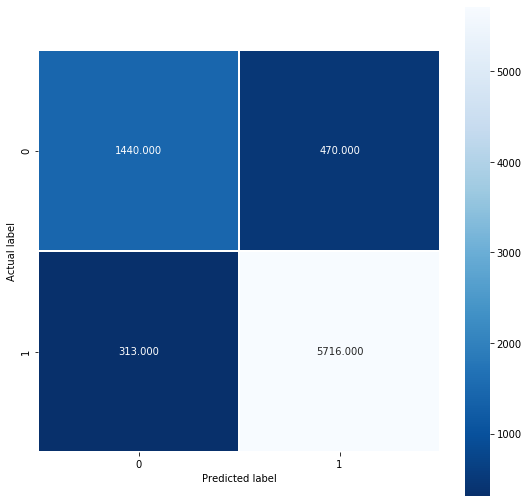

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [37]:
# Precisão, recall, F1

print(metrics.classification_report(reviews_test["recommend_to_a_friend"], predictions, digits=3))

              precision    recall  f1-score   support

       False      0.821     0.754     0.786      1910
        True      0.924     0.948     0.936      6029

    accuracy                          0.901      7939
   macro avg      0.873     0.851     0.861      7939
weighted avg      0.899     0.901     0.900      7939



In [38]:
scoring = 'accuracy'
kfold = KFold(10, random_state = 42,shuffle=True)
scores = cross_val_score(model["classifier"], dtm_train, reviews_train["recommend_to_a_friend"], cv=kfold)
print('Cross-validation scores: {}'.format(scores))
print('average score: {}'.format(scores.mean()))
ac1 =  scores.mean()

C:\Users\conta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\conta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\conta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\conta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\conta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Cross-validation scores: [0.89476525 0.90070157 0.89524838 0.89902808 0.91036717 0.9087473
 0.90172786 0.91198704 0.90820734 0.8925486 ]
average score: 0.9023328581635758


C:\Users\conta\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# TF-IDF e Regressão Logística

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=nltk.word_tokenize)),
    ("classifier", LogisticRegression(solver="saga", C=10))
])
model.fit(reviews_train["review_text"], reviews_train["recommend_to_a_friend"])
model.score(reviews_test["review_text"], reviews_test["recommend_to_a_friend"])

0.903766217407734

In [41]:
dtm_train = model["vectorizer"].fit_transform(reviews_train["review_text"])

In [42]:
len(model["vectorizer"].get_feature_names())

20502

In [43]:
dtm_train

<18522x20502 sparse matrix of type '<class 'numpy.float64'>'
	with 360613 stored elements in Compressed Sparse Row format>

In [44]:
dtm_train.astype(bool).mean()

0.0009496362181714933

In [45]:
dtm_test = model["vectorizer"].transform(reviews_test["review_text"])

In [46]:
model["classifier"].fit(dtm_train, reviews_train["recommend_to_a_friend"]);

In [47]:
model["classifier"].classes_

array([False,  True])

#### Usando o modele

In [48]:
reviews_test['review_text']

5468     recomendo a compra vieram todos os produtos me...
9043     produto excelente recomendoe chegou antes do p...
18875    meu filho amou e eu também lança o dardo na di...
4847     não comprem da ezconet estou até agora esperan...
8054     comprei a maquina com  mas preciso dela  estou...
                               ...                        
3250     cara essa tv não é apenas ultrahd mas é também...
18974    não é um produto original mas se for usado mod...
13771    além de ter um prazo longo pra chegar o produt...
13775    produto incrível faz tudo direitinho super prá...
2568     amei o produtocomprem se você é daqueles que l...
Name: review_text, Length: 7939, dtype: object

In [49]:
new_reviews = reviews_test['review_text'][3250]

In [50]:
new_reviews

'cara essa tv não é apenas ultrahd mas é também ultra cabulosa sinto como se estivesse fumando um eterno baseado quando entro nas ondas e vibrações desse bicho as cores se misturam com minhas alucinações e devaneios percome nos sons alucinantes vi um filme de guerra outro dia o cara tomou um tiro e eu achei que havia me acertado fui para o hospital doidão apenas pra ouvir o médico dizer que eu tava alucinando diz que pegou uns três pacientes naquela semana com problemas mentais por causa dessa tv  recomendo de mais claro vendi um rim e um braço para comprala mas bicho o que é um braço perto do que essa doidera proporciona'

In [51]:
dtm_new = model["vectorizer"].transform([new_reviews])

In [52]:
model["classifier"].predict(dtm_new)

array([ True])

In [53]:
reviews_test['recommend_to_a_friend'][3250]

True

In [54]:
# Acurácia
model["classifier"].score(dtm_test, reviews_test["recommend_to_a_friend"])

0.903766217407734

In [55]:
# matrix de confusão
predictions = model["classifier"].predict(dtm_test)
cm = metrics.confusion_matrix(reviews_test["recommend_to_a_friend"], predictions)
print(cm)

[[1465  445]
 [ 319 5710]]


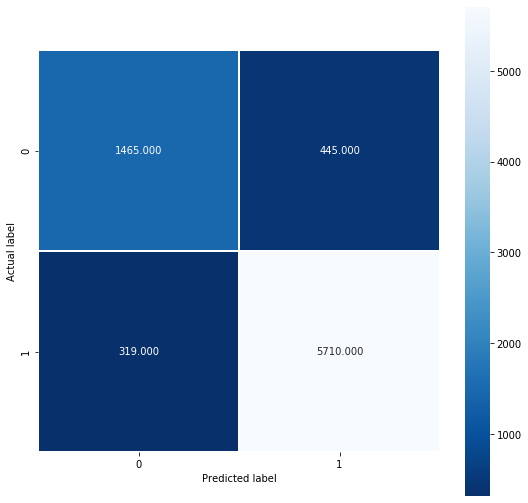

In [56]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [57]:
# Precisão, recall, F1

print(metrics.classification_report(reviews_test["recommend_to_a_friend"], predictions, digits=3))

              precision    recall  f1-score   support

       False      0.821     0.767     0.793      1910
        True      0.928     0.947     0.937      6029

    accuracy                          0.904      7939
   macro avg      0.874     0.857     0.865      7939
weighted avg      0.902     0.904     0.903      7939



In [58]:
# Acurácia

metrics.accuracy_score(reviews_test["recommend_to_a_friend"], predictions)

0.903766217407734

In [59]:
scoring = 'accuracy'
kfold = KFold(10, random_state = 42,shuffle=True)
scores = cross_val_score(model["classifier"], dtm_train, reviews_train["recommend_to_a_friend"], cv=kfold)
print('Cross-validation scores: {}'.format(scores))
print('average score: {}'.format(scores.mean()))
ac2 =  scores.mean()

Cross-validation scores: [0.89260658 0.8985429  0.89632829 0.89956803 0.90064795 0.90226782
 0.90388769 0.90712743 0.90064795 0.8849892 ]
average score: 0.8986613850168835


# CountVectorizer e Naive Bayes

In [60]:
from sklearn import naive_bayes

In [61]:
model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", naive_bayes.MultinomialNB())
])

In [62]:
dtm_train = model["vectorizer"].fit_transform(reviews_train["review_text"])

In [63]:
dtm_test = model["vectorizer"].transform(reviews_test["review_text"])

In [64]:
model["classifier"].fit(dtm_train, reviews_train["recommend_to_a_friend"]);

In [65]:
model["classifier"].classes_

array([False,  True])

In [66]:
new_reviews = reviews_test['review_text'][3250]

In [67]:
new_reviews

'cara essa tv não é apenas ultrahd mas é também ultra cabulosa sinto como se estivesse fumando um eterno baseado quando entro nas ondas e vibrações desse bicho as cores se misturam com minhas alucinações e devaneios percome nos sons alucinantes vi um filme de guerra outro dia o cara tomou um tiro e eu achei que havia me acertado fui para o hospital doidão apenas pra ouvir o médico dizer que eu tava alucinando diz que pegou uns três pacientes naquela semana com problemas mentais por causa dessa tv  recomendo de mais claro vendi um rim e um braço para comprala mas bicho o que é um braço perto do que essa doidera proporciona'

In [68]:
dtm_new = model["vectorizer"].transform([new_reviews])

In [69]:
model["classifier"].predict(dtm_new)

array([False])

In [70]:
reviews_test['recommend_to_a_friend'][3250]

True

In [71]:
# Acurácia

model["classifier"].score(dtm_test, reviews_test["recommend_to_a_friend"])

0.8943191837762943

In [72]:
# matrix de confusão
predictions = model["classifier"].predict(dtm_test)
cm = metrics.confusion_matrix(reviews_test["recommend_to_a_friend"], predictions)
print(cm)

[[1520  390]
 [ 449 5580]]


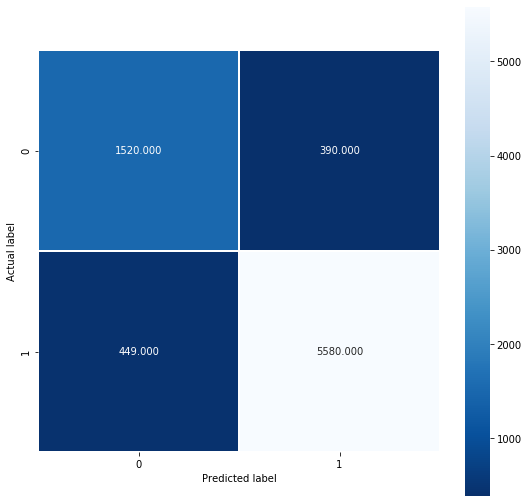

In [73]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [74]:
# Precisão, recall, F1

print(metrics.classification_report(reviews_test["recommend_to_a_friend"], predictions, digits=3))

              precision    recall  f1-score   support

       False      0.772     0.796     0.784      1910
        True      0.935     0.926     0.930      6029

    accuracy                          0.894      7939
   macro avg      0.853     0.861     0.857      7939
weighted avg      0.896     0.894     0.895      7939



In [75]:
scoring = 'accuracy'
kfold = KFold(10, random_state = 42,shuffle=True)
scores = cross_val_score(model["classifier"], dtm_train, reviews_train["recommend_to_a_friend"], cv=kfold)
print('Cross-validation scores: {}'.format(scores))
print('average score: {}'.format(scores.mean()))
ac3 =  scores.mean()

Cross-validation scores: [0.87695629 0.88882893 0.88768898 0.89146868 0.89578834 0.90064795
 0.89146868 0.89956803 0.89038877 0.88066955]
average score: 0.8903474198049046


# TF-IDF e Naive Bayes

In [76]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=nltk.word_tokenize)),
    ("classifier", naive_bayes.MultinomialNB())
])
model.fit(reviews_train["review_text"], reviews_train["recommend_to_a_friend"])
model.score(reviews_test["review_text"], reviews_test["recommend_to_a_friend"])

0.8599319813578536

In [77]:
dtm_train = model["vectorizer"].fit_transform(reviews_train["review_text"])

In [78]:
dtm_test = model["vectorizer"].transform(reviews_test["review_text"])

In [79]:
model["classifier"].fit(dtm_train, reviews_train["recommend_to_a_friend"]);

In [80]:
new_reviews = reviews_test['review_text'][3250]

In [81]:
dtm_new = model["vectorizer"].transform([new_reviews])

In [82]:
model["classifier"].predict(dtm_new)

array([ True])

In [83]:
reviews_test['recommend_to_a_friend'][3250]

True

In [84]:
# Acurácia
model["classifier"].score(dtm_test, reviews_test["recommend_to_a_friend"])

0.8599319813578536

In [85]:
# matrix de confusão
predictions = model["classifier"].predict(dtm_test)
cm = metrics.confusion_matrix(reviews_test["recommend_to_a_friend"], predictions)
print(cm)

[[ 892 1018]
 [  94 5935]]


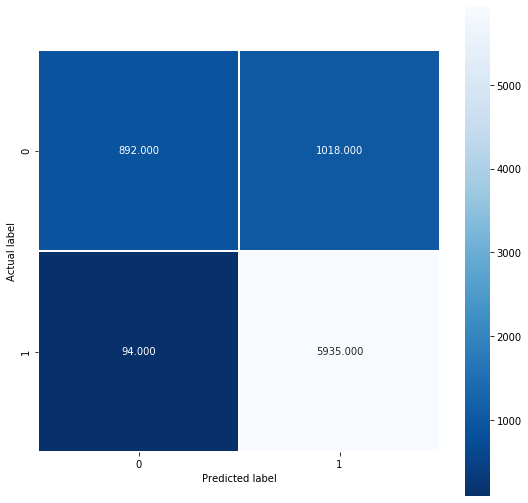

In [87]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [88]:
# Precisão, recall, F1

print(metrics.classification_report(reviews_test["recommend_to_a_friend"], predictions, digits=3))

              precision    recall  f1-score   support

       False      0.905     0.467     0.616      1910
        True      0.854     0.984     0.914      6029

    accuracy                          0.860      7939
   macro avg      0.879     0.726     0.765      7939
weighted avg      0.866     0.860     0.843      7939



In [89]:
scoring = 'accuracy'
kfold = KFold(10, random_state = 42,shuffle=True)
scores = cross_val_score(model["classifier"], dtm_train, reviews_train["recommend_to_a_friend"], cv=kfold)
print('Cross-validation scores: {}'.format(scores))
print('average score: {}'.format(scores.mean()))
ac4 =  scores.mean()

Cross-validation scores: [0.85321101 0.84943335 0.84449244 0.85421166 0.86339093 0.86393089
 0.86069114 0.86069114 0.83963283 0.85097192]
average score: 0.8540657319459776


# CountVectorizer e SVM

In [90]:
from sklearn import svm

In [91]:
model = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", svm.SVC())
])

In [92]:
dtm_train = model["vectorizer"].fit_transform(reviews_train["review_text"])

In [93]:
dtm_test = model["vectorizer"].transform(reviews_test["review_text"])

In [94]:
model["classifier"].fit(dtm_train, reviews_train["recommend_to_a_friend"]);

In [95]:
model["classifier"].classes_

array([False,  True])

In [96]:
new_reviews = reviews_test['review_text'][3250]

In [97]:
new_reviews

'cara essa tv não é apenas ultrahd mas é também ultra cabulosa sinto como se estivesse fumando um eterno baseado quando entro nas ondas e vibrações desse bicho as cores se misturam com minhas alucinações e devaneios percome nos sons alucinantes vi um filme de guerra outro dia o cara tomou um tiro e eu achei que havia me acertado fui para o hospital doidão apenas pra ouvir o médico dizer que eu tava alucinando diz que pegou uns três pacientes naquela semana com problemas mentais por causa dessa tv  recomendo de mais claro vendi um rim e um braço para comprala mas bicho o que é um braço perto do que essa doidera proporciona'

In [98]:
dtm_new = model["vectorizer"].transform([new_reviews])

In [99]:
model["classifier"].predict(dtm_new)

array([False])

In [100]:
reviews_test['recommend_to_a_friend'][3250]

True

In [101]:
# Acurácia

model["classifier"].score(dtm_test, reviews_test["recommend_to_a_friend"])

0.8997354830583197

In [102]:
# matrix de confusão
predictions = model["classifier"].predict(dtm_test)
cm = metrics.confusion_matrix(reviews_test["recommend_to_a_friend"], predictions)
print(cm)

[[1438  472]
 [ 324 5705]]


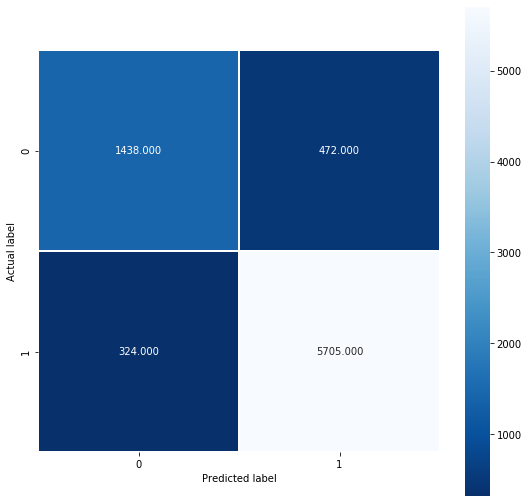

In [104]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [105]:
# Precisão, recall, F1

print(metrics.classification_report(reviews_test["recommend_to_a_friend"], predictions, digits=3))

              precision    recall  f1-score   support

       False      0.816     0.753     0.783      1910
        True      0.924     0.946     0.935      6029

    accuracy                          0.900      7939
   macro avg      0.870     0.850     0.859      7939
weighted avg      0.898     0.900     0.898      7939



In [106]:
scoring = 'accuracy'
kfold = KFold(10, random_state = 42,shuffle=True)
scores = cross_val_score(model["classifier"], dtm_train, reviews_train["recommend_to_a_friend"], cv=kfold)
print('Cross-validation scores: {}'.format(scores))
print('average score: {}'.format(scores.mean()))
ac5 =  scores.mean()

Cross-validation scores: [0.89476525 0.9017809  0.89686825 0.89794816 0.90928726 0.89686825
 0.90604752 0.9087473  0.89848812 0.89092873]
average score: 0.9001729726705511


# TF-IDF e SMV

In [107]:
model = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=nltk.word_tokenize)),
    ("classifier", svm.SVC())
])
model.fit(reviews_train["review_text"], reviews_train["recommend_to_a_friend"])
model.score(reviews_test["review_text"], reviews_test["recommend_to_a_friend"])

0.9067892681697947

In [108]:
dtm_train = model["vectorizer"].fit_transform(reviews_train["review_text"])

In [109]:
dtm_test = model["vectorizer"].transform(reviews_test["review_text"])

In [110]:
model["classifier"].fit(dtm_train, reviews_train["recommend_to_a_friend"]);

In [111]:
new_reviews = reviews_test['review_text'][3250]

In [112]:
dtm_new = model["vectorizer"].transform([new_reviews])

In [113]:
model["classifier"].predict(dtm_new)

array([ True])

In [114]:
reviews_test['recommend_to_a_friend'][3250]

True

In [115]:
# Acurácia
model["classifier"].score(dtm_test, reviews_test["recommend_to_a_friend"])

0.9067892681697947

In [116]:
# matrix de confusão
predictions = model["classifier"].predict(dtm_test)
cm = metrics.confusion_matrix(reviews_test["recommend_to_a_friend"], predictions)
print(cm)

[[1436  474]
 [ 266 5763]]


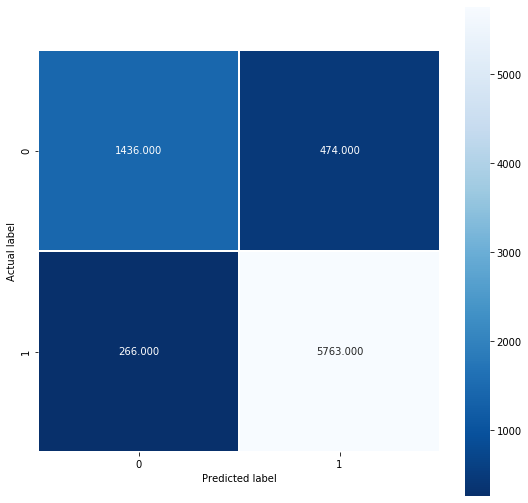

In [117]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [118]:
# Precisão, recall, F1

print(metrics.classification_report(reviews_test["recommend_to_a_friend"], predictions, digits=3))

              precision    recall  f1-score   support

       False      0.844     0.752     0.795      1910
        True      0.924     0.956     0.940      6029

    accuracy                          0.907      7939
   macro avg      0.884     0.854     0.867      7939
weighted avg      0.905     0.907     0.905      7939



In [119]:
scoring = 'accuracy'
kfold = KFold(10, random_state = 42,shuffle=True)
scores = cross_val_score(model["classifier"], dtm_train, reviews_train["recommend_to_a_friend"], cv=kfold)
print('Cross-validation scores: {}'.format(scores))
print('average score: {}'.format(scores.mean()))
ac6 =  scores.mean()

Cross-validation scores: [0.89800324 0.90124123 0.89686825 0.90280778 0.90766739 0.90550756
 0.91414687 0.92062635 0.90982721 0.8925486 ]
average score: 0.9049244468429574


### Compare os 6 resultados.

In [120]:
print('CountVectorizer e Regressão Logística: {}'.format(ac1))
print('TF-IDF e Regressão Logística: {}'.format(ac2))
print('CountVectorizer e Naive Bayes: {}'.format(ac3))
print('TF-IDF e Naive Bayes: {}'.format(ac4))
print('CountVectorizer e SVM: {}'.format(ac5))
print('TF-IDF e SVM: {}'.format(ac6))

CountVectorizer e Regressão Logística: 0.9023328581635758
TF-IDF e Regressão Logística: 0.8986613850168835
CountVectorizer e Naive Bayes: 0.8903474198049046
TF-IDF e Naive Bayes: 0.8540657319459776
CountVectorizer e SVM: 0.9001729726705511
TF-IDF e SVM: 0.9049244468429574
